In [1]:
import os
import cv2
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
def load_images_from_folder(folder):
    images = []
    labels = []
    for subfolder in os.listdir(folder):
        path = os.path.join(folder, subfolder)
        for filename in os.listdir(path):
            img_path = os.path.join(path, filename)
            img = cv2.imread(img_path)
            img = cv2.resize(img, (128, 128))
            images.append(img)
            labels.append(subfolder)
    return images, labels

folder = 'D:\\PlantVillage'
images, labels = load_images_from_folder(folder)


In [3]:
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)


In [4]:
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)


In [5]:
clf = RandomForestClassifier(n_estimators=250, max_depth=35, random_state=42)
clf.fit(X_train.reshape(X_train.shape[0], -1), y_train)
y_pred = clf.predict(X_test.reshape(X_test.shape[0], -1))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


                               precision    recall  f1-score   support

Pepper__bell___Bacterial_spot       0.90      0.65      0.75       189
       Pepper__bell___healthy       0.72      0.84      0.77       279
        Potato___Early_blight       0.81      0.90      0.85       203
         Potato___Late_blight       0.69      0.70      0.69       202
             Potato___healthy       0.85      0.80      0.82       196
          Tomato_Early_blight       0.84      0.51      0.63       229
          Tomato__Target_Spot       0.68      0.88      0.77       262
  Tomato__Tomato_mosaic_virus       0.98      0.66      0.79        73
               Tomato_healthy       0.85      0.96      0.90       215

                     accuracy                           0.78      1848
                    macro avg       0.81      0.77      0.78      1848
                 weighted avg       0.79      0.78      0.77      1848

[[123  21  10   9  10   3   7   0   6]
 [  2 234   6  13   5   4  13   0  

ValueError: The number of FixedLocator locations (9), usually from a call to set_ticks, does not match the number of ticklabels (9802).

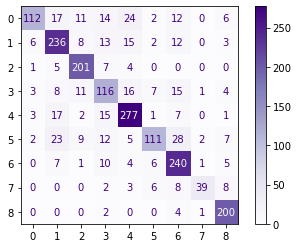

In [8]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred), display_labels=labels)
disp.plot(include_values=True, cmap=plt.cm.Purples)
plt.xlabel('Predicted')
plt.xticks(rotation = 25)
plt.ylabel('Actual')
plt.show()